In [1]:
import pandas as pd

df = pd.read_stata("data-exercise-01-fes.dta")
df.head()

,hhref,weight,totinc,totexp,food,region,numads,kids0,kids1,kids2,kids34,kids510,kids1116,kids1718,agehead
0,1,0.856118,136.800003,68.044998,20.684999,Northern,1,0,0,0,0,1,0,0,34
1,2,0.856118,178.220001,134.720001,29.410000,Northern,1,0,0,0,0,1,1,0,36
2,3,1.147964,193.119995,220.154007,45.145000,Northern,2,0,0,0,0,0,0,0,40
3,4,1.008699,202.930008,101.184998,17.905001,Northern,1,0,0,0,0,0,0,0,74
4,5,1.169602,222.209991,81.120003,17.420000,Northern,1,0,0,0,0,0,0,0,83


In [2]:
# Summary of dataset
df.info()

# Descriptive statistics
df.describe()

# List all column names
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6949 entries, 0 to 6948
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   hhref     6949 non-null   int16   
 1   weight    6949 non-null   float32 
 2   totinc    6949 non-null   float32 
 3   totexp    6949 non-null   float32 
 4   food      6949 non-null   float32 
 5   region    6949 non-null   category
 6   numads    6949 non-null   int8    
 7   kids0     6949 non-null   int8    
 8   kids1     6949 non-null   int8    
 9   kids2     6949 non-null   int8    
 10  kids34    6949 non-null   int8    
 11  kids510   6949 non-null   int8    
 12  kids1116  6949 non-null   int8    
 13  kids1718  6949 non-null   int8    
 14  agehead   6949 non-null   int8    
dtypes: category(1), float32(4), int16(1), int8(9)
memory usage: 190.5 KB
Index(['hhref', 'weight', 'totinc', 'totexp', 'food', 'region', 'numads',
       'kids0', 'kids1', 'kids2', 'kids34', 'kids510', 'kids1116'

In [3]:
# Frequency table for 'kids510'
df['kids510'].value_counts(normalize=True)

# Summary statistics for 'kids510'
df['kids510'].describe()


count    6949.000000
mean        0.225788
std         0.561776
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: kids510, dtype: float64

In [6]:
# Annual income
df['anninc'] = df['totinc'] * 52

# Number of children
kids_cols = ['kids0', 'kids1', 'kids2', 'kids34', 'kids510', 'kids1116', 'kids1718']
df['numkids'] = df[kids_cols].sum(axis=1)

# Single parent dummy
df['singpar'] = ((df['numads'] == 1) & (df['numkids'] > 0)).astype(int)

# Inspecting DataFrame
df.head()

,hhref,weight,totinc,totexp,food,region,numads,kids0,kids1,kids2,kids34,kids510,kids1116,kids1718,agehead,anninc,numkids,singpar
0,1,0.856118,136.800003,68.044998,20.684999,Northern,1,0,0,0,0,1,0,0,34,7113.600098,1,1
1,2,0.856118,178.220001,134.720001,29.410000,Northern,1,0,0,0,0,1,1,0,36,9267.440430,2,1
2,3,1.147964,193.119995,220.154007,45.145000,Northern,2,0,0,0,0,0,0,0,40,10042.240234,0,0
3,4,1.008699,202.930008,101.184998,17.905001,Northern,1,0,0,0,0,0,0,0,74,10552.360352,0,0
4,5,1.169602,222.209991,81.120003,17.420000,Northern,1,0,0,0,0,0,0,0,83,11554.919922,0,0


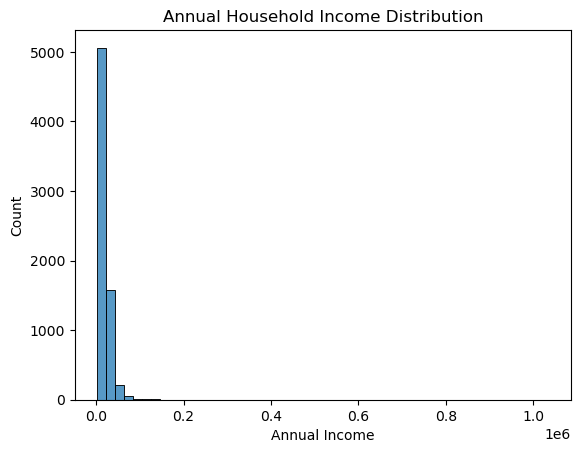

/var/folders/xl/7_m5fsws7r33y18gh28hn8br0000gn/T/ipykernel_13594/2498696071.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['anninc'], shade=True)


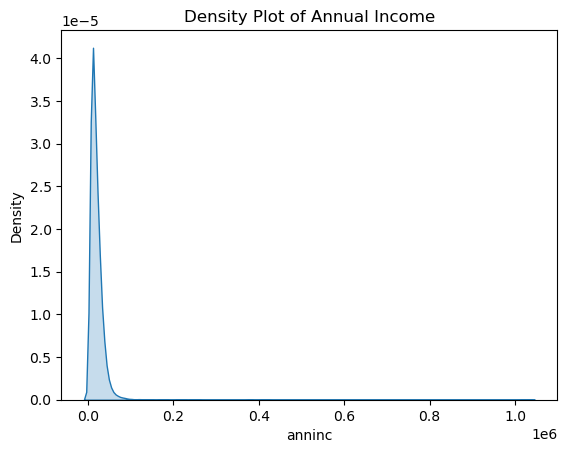

/var/folders/xl/7_m5fsws7r33y18gh28hn8br0000gn/T/ipykernel_13594/2498696071.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['log_anninc'].dropna(), shade=True)


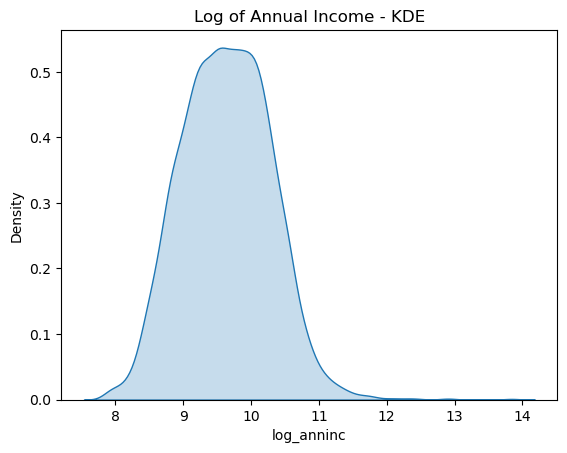

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of annual income
sns.histplot(df['anninc'], bins=50)
plt.title("Annual Household Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

# Kernel density
sns.kdeplot(df['anninc'], shade=True)
plt.title("Density Plot of Annual Income")
plt.show()

# Log of income
import numpy as np
df['log_anninc'] = np.log(df['anninc'].replace(0, np.nan))

sns.kdeplot(df['log_anninc'].dropna(), shade=True)
plt.title("Log of Annual Income - KDE")
plt.show()


In [8]:
# 60% of median income
poverty_line = df['anninc'].median() * 0.6

# Poverty flag
df['poor'] = (df['anninc'] < poverty_line).astype(int)

# Proportion of poor households
poor_rate = df['poor'].mean()

# Proportion of poor households with children
df['has_kids'] = (df['numkids'] > 0).astype(int)
poor_with_kids = df[df['poor'] == 1]['has_kids'].mean()

print("Poverty line:", poverty_line)
print("Poverty rate:", poor_rate)
print("Proportion of poor households with kids:", poor_with_kids)


Poverty line: 9088.8720703125
Poverty rate: 0.23255144625125918
Proportion of poor households with kids: 0.1974009900990099


In [9]:
# Income and spending quartiles
df['inc_quartile'] = pd.qcut(df['totinc'], 4, labels=False)
df['exp_quartile'] = pd.qcut(df['totexp'], 4, labels=False)

# Cross-tab
pd.crosstab(df['inc_quartile'], df['exp_quartile'], normalize='index')


exp_quartile,0,1,2,3
inc_quartile,,,,
0,0.699655,0.219793,0.062140,0.018412
1,0.257916,0.458261,0.210708,0.073115
2,0.035118,0.266552,0.456534,0.241796
3,0.007484,0.055268,0.270581,0.666667


In [10]:
# Mean income by region
region_means = df.groupby('region')['totinc'].mean()

# Mean income by household type (you'd need to define hhtype first)
# For now, example:
# df['hhtype'] = ...


/var/folders/xl/7_m5fsws7r33y18gh28hn8br0000gn/T/ipykernel_13594/4289808504.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_means = df.groupby('region')['totinc'].mean()


In [11]:
from scipy import stats

# Let's compare mean poverty rate between families and non-families
df['family'] = (df['numkids'] > 0).astype(int)

family_poor = df[df['family'] == 1]['poor']
nonfamily_poor = df[df['family'] == 0]['poor']

t_stat, p_value = stats.ttest_ind(family_poor, nonfamily_poor)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -13.709165764320069
P-value: 3.160771575973994e-42


In [12]:
# Drop top and bottom 4 incomes
df_sorted = df.sort_values('totinc')
df_trimmed = df_sorted.iloc[4:-4]

# Re-check distribution
df_trimmed['totinc'].describe()


count    6941.000000
mean      363.559326
std       295.250885
min        51.019997
25%       181.270004
50%       291.309998
75%       465.339996
max      7292.209961
Name: totinc, dtype: float64

In [13]:
# Weighted average using np.average
weighted_mean = np.average(df['totinc'], weights=df['weight'])

print("Weighted mean income:", weighted_mean)


Weighted mean income: 377.85492


In [14]:
df['equiv_inc'] = df['anninc'] / df['scale']

# Compare across groups
df.groupby('hhtype')['equiv_inc'].mean()


KeyError: 'scale'